<a href="https://colab.research.google.com/github/DiannanWei/UTS_ML2019_ID12998872/blob/master/A2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/DiannanWei/UTS_ML2019_ID12998872/master/A2_dataset.csv'
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


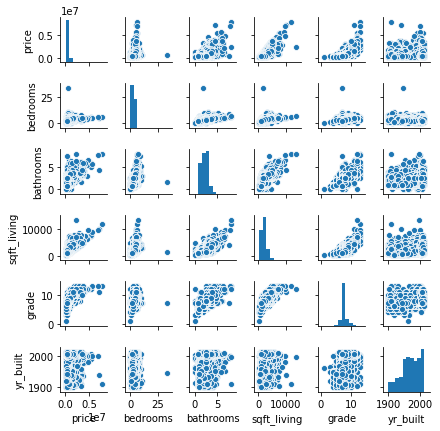

In [0]:
import seaborn as sns
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built']
sns.pairplot(data[features],height=1)

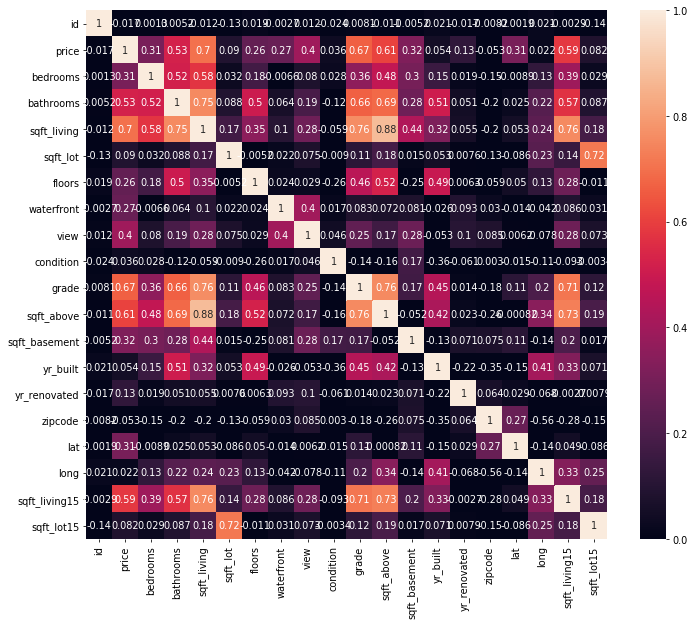

In [0]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(12,10),dpi=70)
sns.heatmap(data.corr(),annot =True,vmin = 0, vmax = 1)

In [0]:
data = data.drop(['id'],axis=1)
data['date']=data['date'].map(lambda x:x.replace('T',''))
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
feature_data = data.drop(['price'],axis=1)
target_data = data['price']

from sklearn.preprocessing import StandardScaler
x_ss = StandardScaler()
feature_data = x_ss.fit_transform(feature_data)
target_data = x_ss.fit_transform(target_data.values.reshape(-1,1))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=37)
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Linear regression model

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:

from sklearn.linear_model import LinearRegression
import time ##record runtime
start =time.clock()
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
end = time.clock()
print('Running time: %s Seconds'%(end-start))

Running time: 0.014762999999998527 Seconds


In [0]:
y_predict = lin_reg.predict(x_test)
print (y_predict) 

[[-0.05921903]
 [-0.66276271]
 [-0.30073491]
 ...
 [ 0.23881872]
 [ 0.64292412]
 [ 1.63230401]]


In [0]:
print (lin_reg.score(x_test, y_test)) # output R^2

0.7135001957462601


## SVM model

In [0]:
from sklearn.svm import SVR
import time ##record runtime
start =time.clock()
linear_svr = SVR(kernel="linear")
linear_svr.fit(x_train, y_train)
linear_svr_y_predict = linear_svr.predict(x_test)
end = time.clock()
print('Running time: %s Seconds'%(end-start))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Running time: 72.57983100000001 Seconds


In [0]:
print(linear_svr.score(x_test, y_test))

0.6676371713941748
